# Module 6 Peer Review Assignment

# Problem 1

Suppose $X$ and $Y$ are independent normal random variables with the same mean $\mu$ and the same variance $\sigma^2$. Do the random variables $W = X + Y$ and $U=2X$ have the same distribution? Explain.

$\begin{array}
&E[W]=E[X]+E[Y]=\mu+\mu=2\mu \\
Var(W)=Var(X)+Var(Y)=\sigma^2+\sigma^2=2\sigma^2, \text{ since $X, Y$ independent} \\
\implies W \sim \mathcal{N}(2\mu, 2\sigma^2) \\
E[U]=E[2X]=2\mu \\
Var(U)=Var(2X)=2^2.Var(X)=4\sigma^2 \\
\implies U \sim \mathcal{N}(2\mu, 4\sigma^2) \\
\end{array}$

Hence, the distributions are not the same.

# Problem 2: Central Limit Theorem and Simulation

**a)** For this problem, we will be sampling from the Uniform distribution with bounds [0, 100]. Before we simulate anything, let's make sure we understand what values to expect. If $X \sim U(0, 100)$, what is $E[X]$ and $Var(X)$?

$E[X]=\frac{0+100}{2}=50$

$Var(X) = \frac{(100-0)^2}{12}=833.33$

**b)** In real life, if we want to estimate the mean of a population, we have to draw a sample from that population and compute the sample mean. The important questions we have to ask are things like:

* Is the sample mean a good approximation of the population mean?
* How large does my sample need to be in order for the sample mean to well-approximate the population mean?

Complete the following function to sample $n$ rows from the $U(0, 100)$ distribution and return the sample mean. Start with a sample size of 10 and draw a sample mean from your function. Is the estimated mean a good approximation for the population mean we computed above? What if you increase the sample size?

In [42]:
uniform.sample.mean = function(n){
    
    # Your Code Here
    sample = runif(n, 0, 100)
    sample.mean = mean(sample)
    return(sample.mean)
}

set.seed(1)
uniform.sample.mean(10)
uniform.sample.mean(100)
uniform.sample.mean(1000)
uniform.sample.mean(10000)

[1] 55.15139

[1] 51.51746

[1] 49.6399

[1] 50.04829

When the sample size is small, e.g., $n=10$, it's not a very good approximation of population mean, since the error in approximation is $\approx \frac{5}{50} \approx 10\%$. But as the sample size is increased, e.g., to $n=10000$, the mean of the sampling distribtion converges to population mean (by LLN and CLT).

**c)** Notice, for a sample size of $n$, our function is returning an estimator of the form

$$
\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i 
$$

That means, if each $X_i$ is a random variable, then our sample mean is also a random variable with its own distribution. We call this disribution the sample distribution. Let's take a look at what this distribution looks like.  

Using the `uniform.sample.mean` function, simulate $m=1000$ sample means, each from a sample of size $n=10$. Create a histogram of these sample means. Then increase the value of $n$ and plot the histogram of those sample means. What do you notice about the distribution of $\bar{X}$? What is the mean $\mu$ and variance $\sigma^2$ of the sample distribution?

[1] 50.33065 83.23977


Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


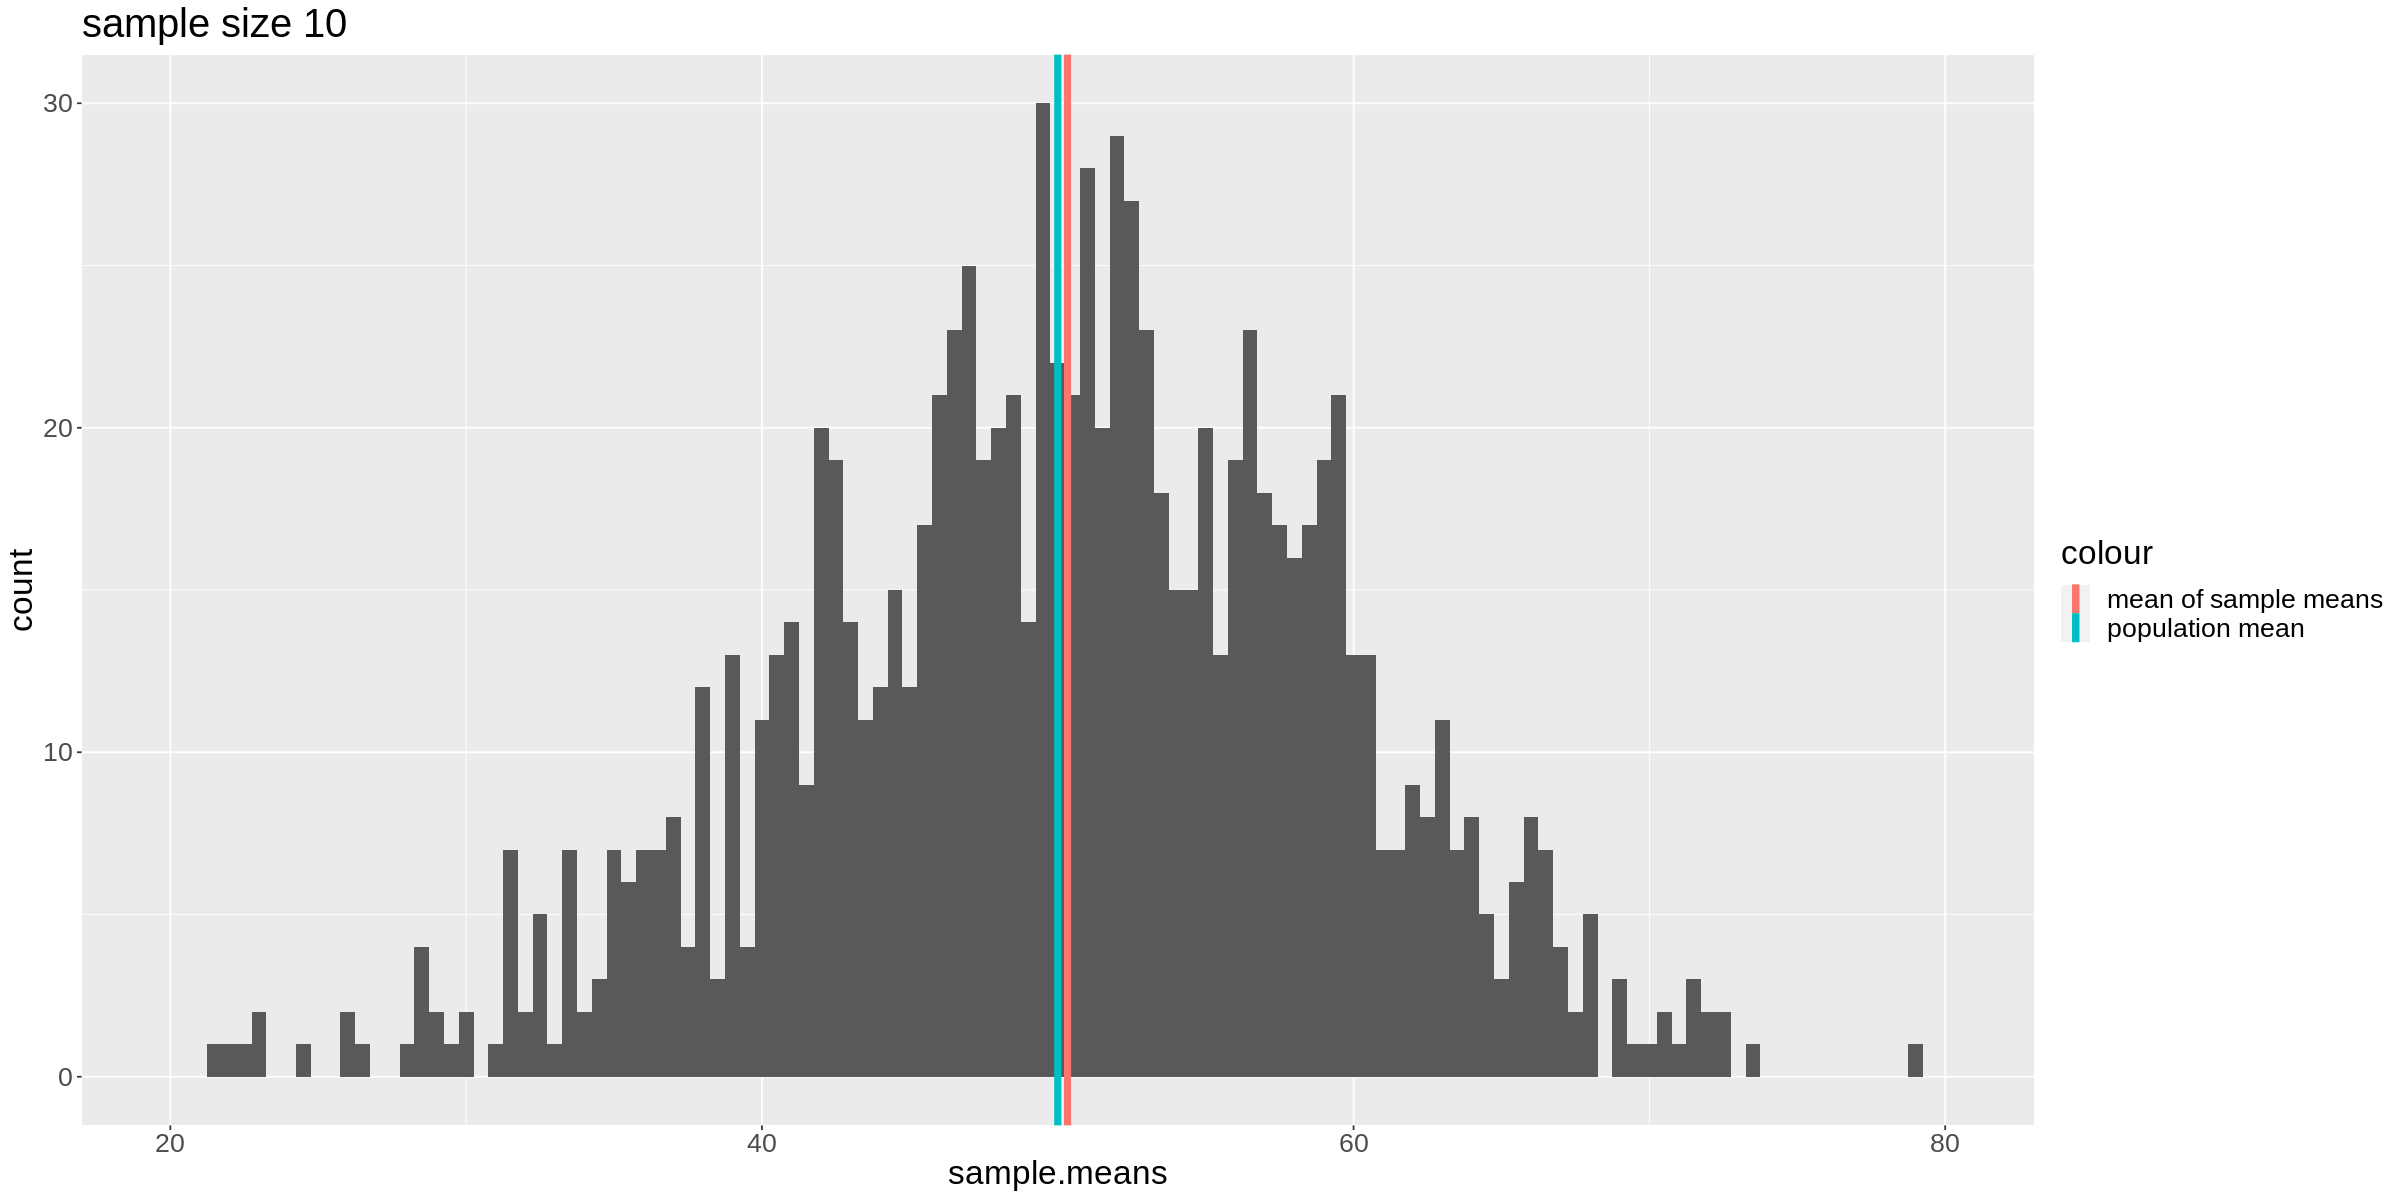

In [63]:
# Your Code Here
options(repr.plot.width=20, repr.plot.height=10)
library(ggplot2)

plot.distr <- function(m, n, mu) {
    sample.means <- replicate(m, uniform.sample.mean(n))
    mean <- mean(sample.means)
    var <- var(sample.means)
    print(c(mean, var))
    ggplot() + geom_histogram(aes(sample.means), binwidth=0.5) + 
               geom_vline(aes(xintercept=mean, color='mean of sample means'), lwd=2) +
               geom_vline(aes(xintercept=mu, color='population mean'), lwd=2) +
               xlim(20,80) +
               theme(text = element_text(size = 20)) +
               ggtitle(sprintf('sample size %d', n))
}

set.seed(2)
m <- 1000
n <- 10
mu <- 50
var <- 833.333

plot.distr(m, n, mu)

[1] 50.122051  8.665967


Warning message:
“Removed 2 rows containing missing values (geom_bar).”


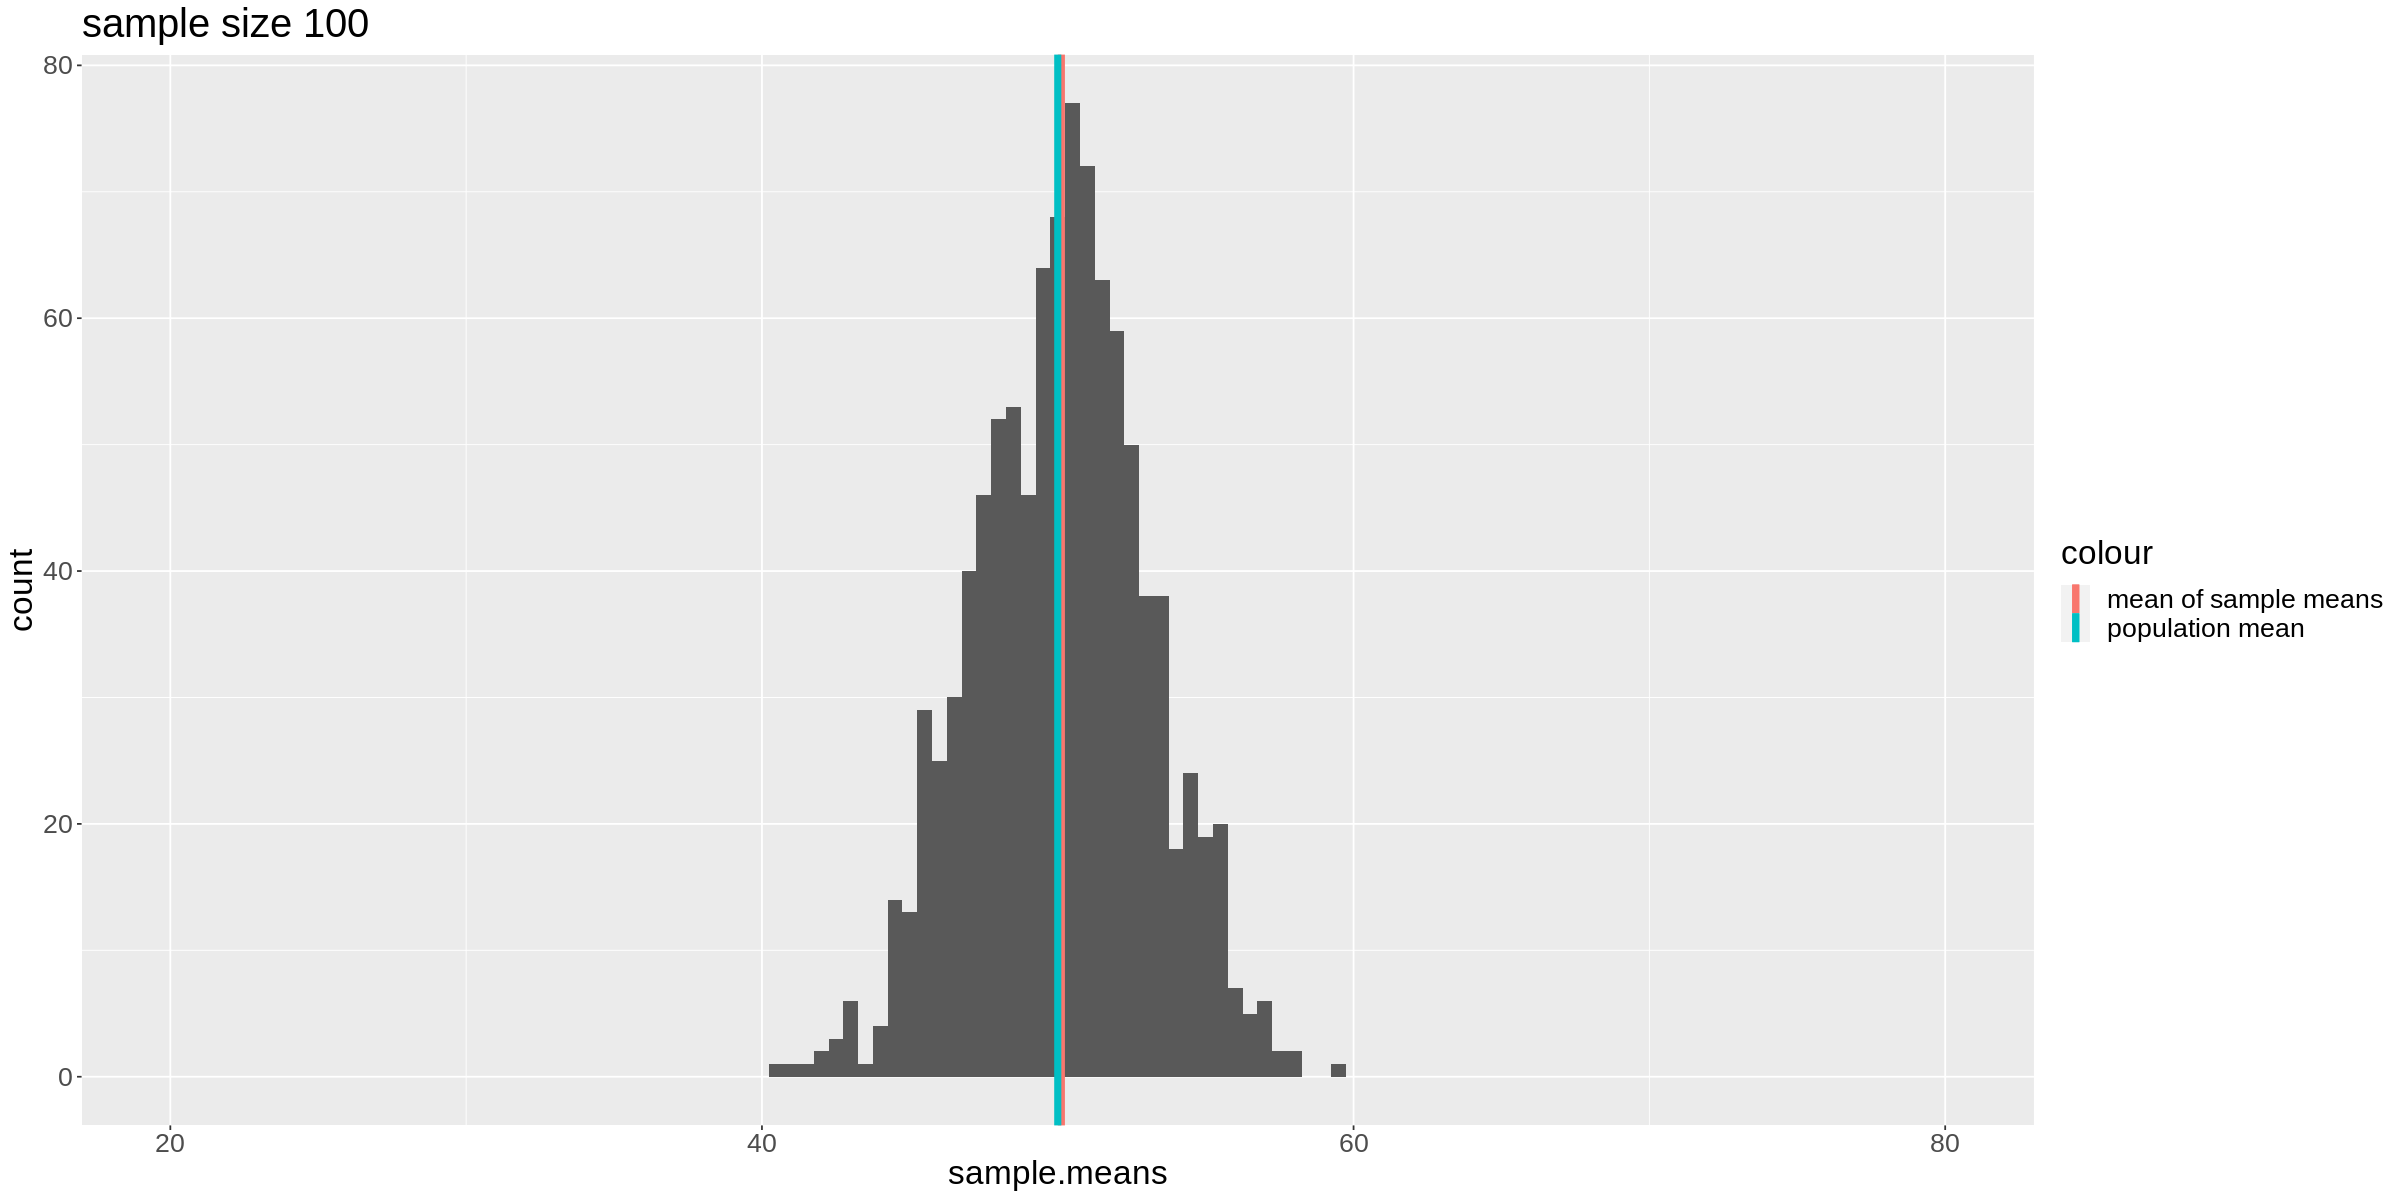

In [57]:
n <- 100
plot.distr(m, n, mu)

[1] 50.023988  0.847323


Warning message:
“Removed 2 rows containing missing values (geom_bar).”


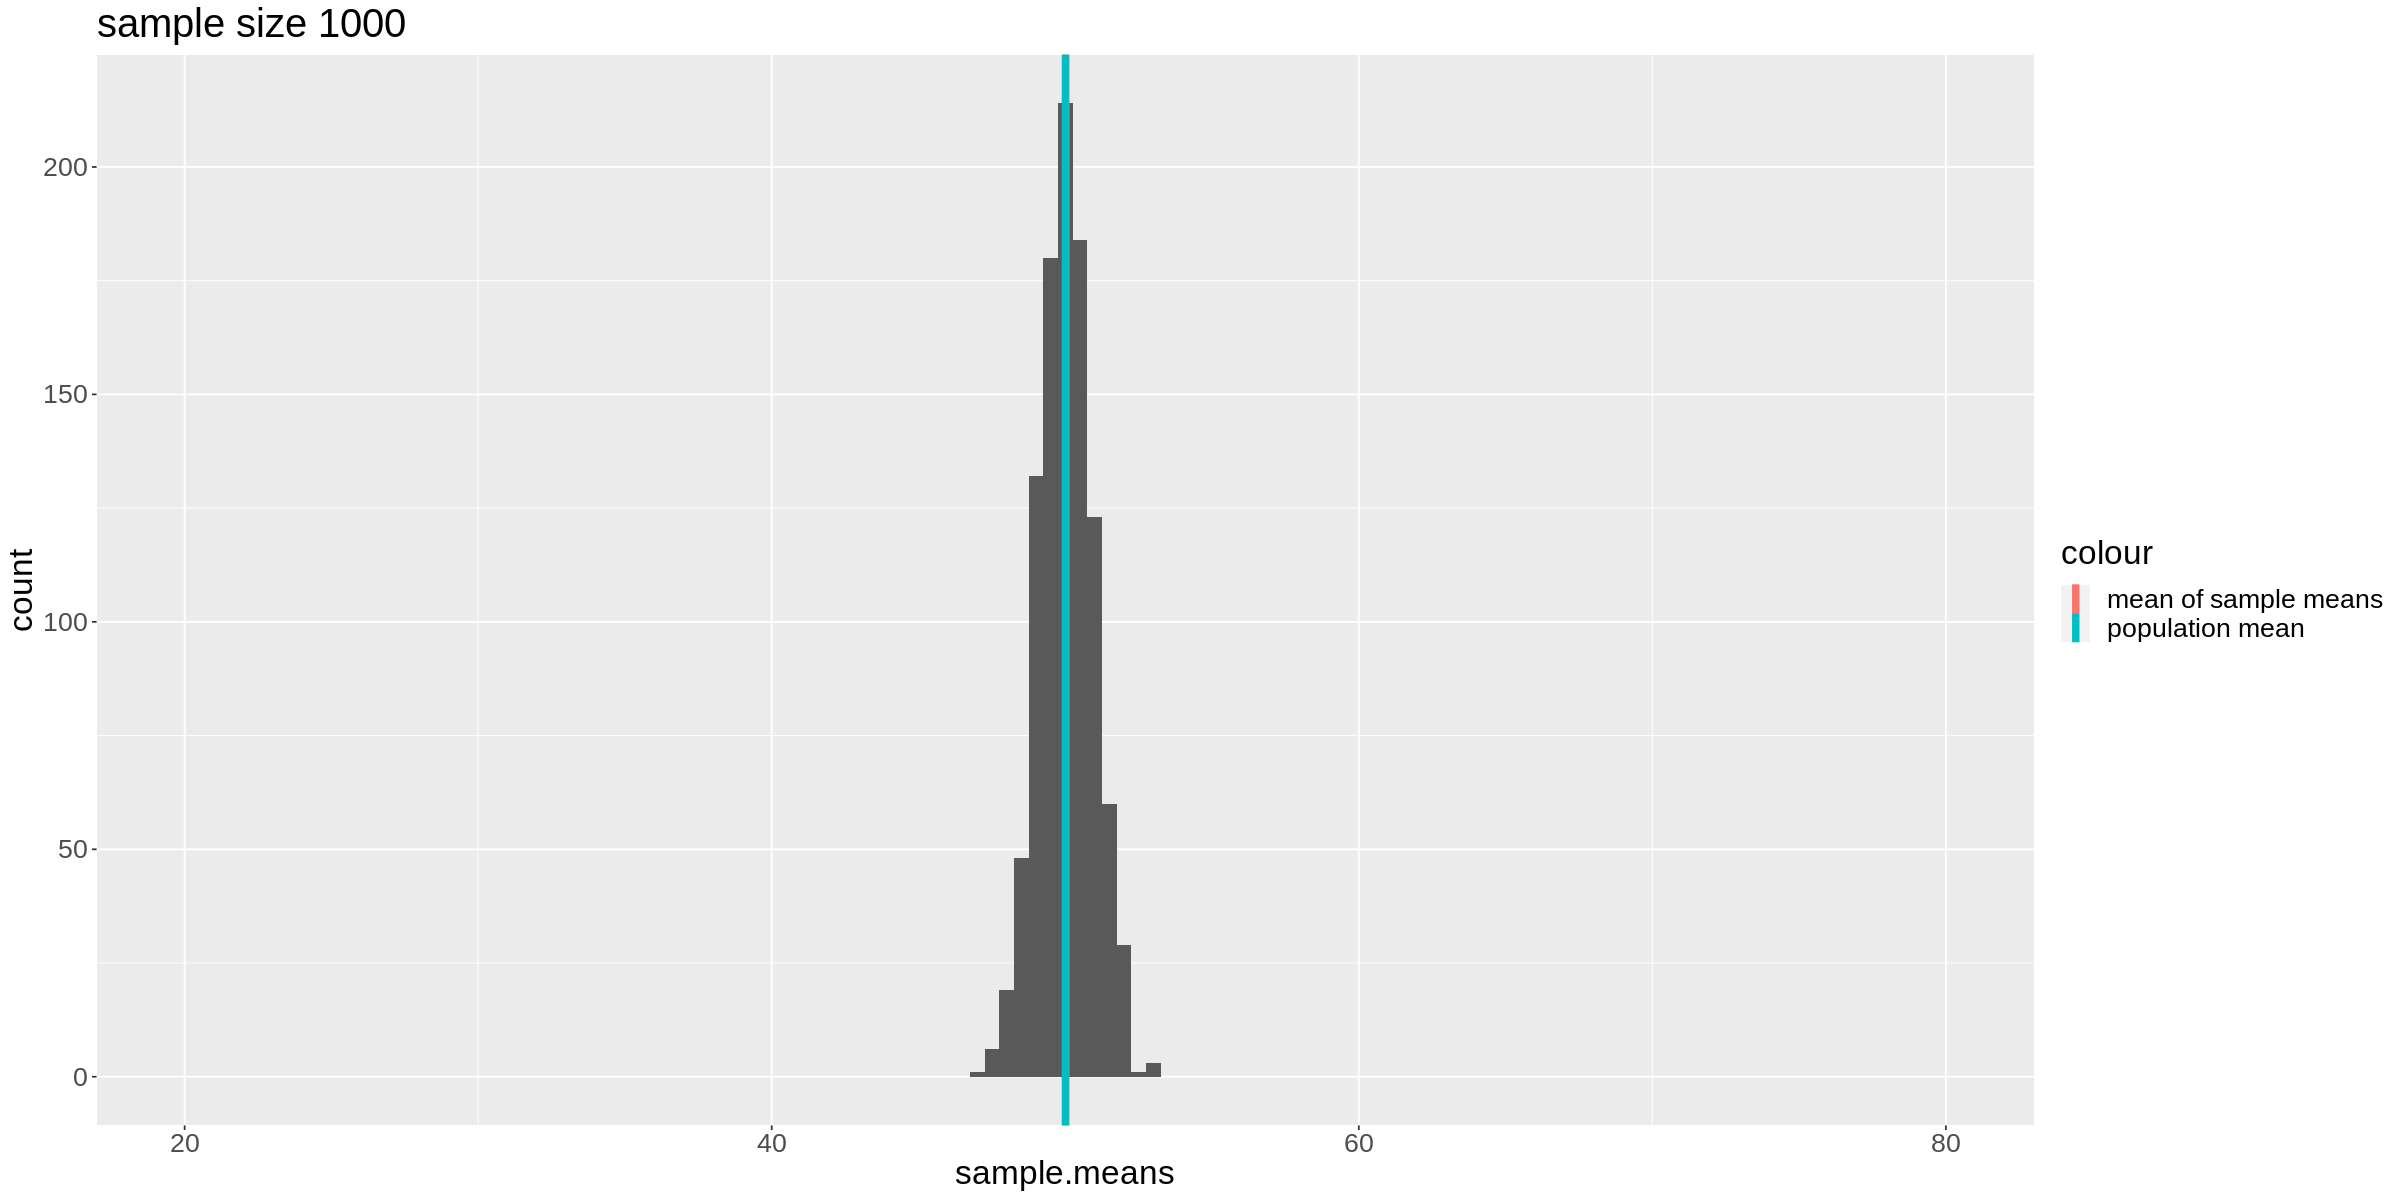

In [58]:
n <- 1000
plot.distr(m, n, mu)

Population mean $=\mu$, variance $=\sigma^2$

By the CLT, $$\frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}}\overset{D}{\rightarrow} \mathcal{N}(0,1)$$ or $$\bar{X}\overset{D}{\rightarrow} \mathcal{N}\left(\mu,\frac{\sigma^2}{n}\right) \text{ as } n \to \infty$$
BY SLLN, $$\bar{X} \overset{a.s.}{\rightarrow} \mu \text{ as } n \to \infty$$

Hence with large sample size $n$, mean of the sampling distribution converges to population mean $\mu=50$, with variance of the distribution as $\frac{\sigma^2}{n}=\frac{833.33}{10}=83.33$, i.e., standard error of sample mean $=SE(\bar{X})=\frac{\sigma}{\sqrt{n}}$ and the mean of the sampling distribution converges (in distribution) to $\mathcal{N}(50, 83.33)$, as can be seen from the above histogram.

The histogram becomes skinnier and taller as we increase the sample size $n$ (spread decreases) and becomes more concentrated around the sample mean, as expected by the CLT.

**d)** Recall that our underlying population distribution is $U(0, 100)$. Try changing the underlying distribution (For example a binomial(10, 0.5)) and check the sample distribution. Be sure to explain what you notice.

[1] 5.008

[1] 5.0233000 0.2459731


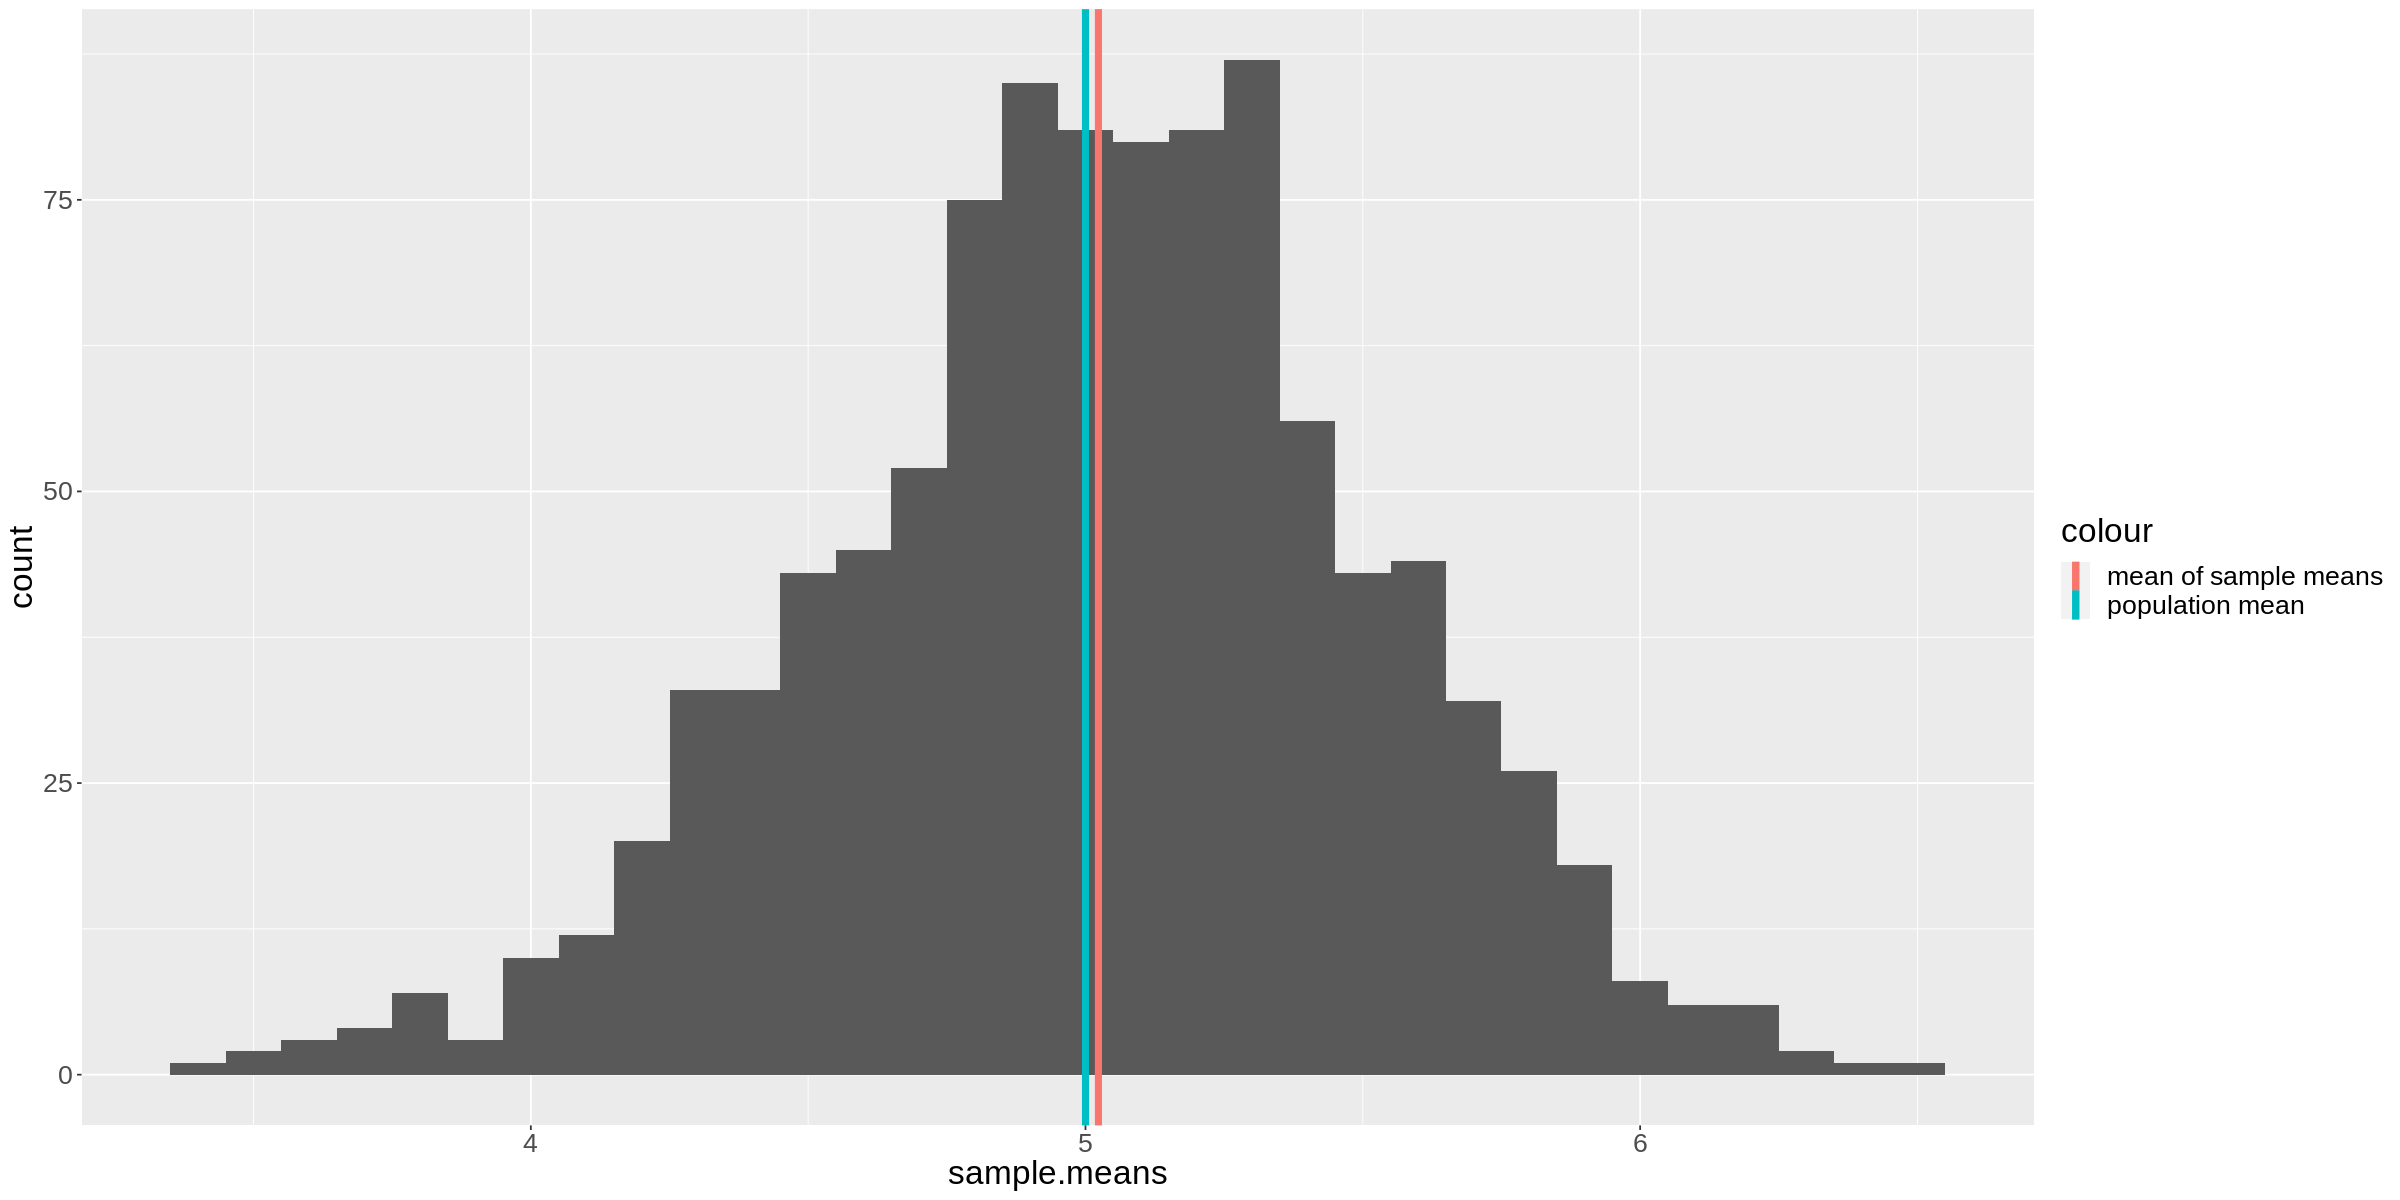

In [62]:
# Your Code Here
binom.sample.mean = function(n){
    
    # Your Code Here
    sample = rbinom(n, 10, 0.5)
    sample.mean = mean(sample)
    return(sample.mean)
}

binom.sample.mean(1000)

set.seed(2)
m <- 1000
n <- 10
mu <- 10*0.5
var <- 10*0.5*(1-0.5)
sample.means <- replicate(m, binom.sample.mean(n))
mean <- mean(sample.means)
var <- var(sample.means)
print(c(mean, var))
library(ggplot2)
ggplot() + geom_histogram(aes(sample.means), binwidth=0.1) + 
           geom_vline(aes(xintercept=mean, color='mean of sample means'), lwd=2) +
           geom_vline(aes(xintercept=mu, color='population mean'), lwd=2) +
           theme(text = element_text(size = 20))

For $X_i \sim B(10, 0.5)$, we have population mean $\mu=10*0.5=5$ and variance $=10*0.5*(1-0.5)=2.5$ 

Again, with large sample size $𝑛$, mean of the sampling distribution converges to population mean $𝜇=5$ (by SLLN, CLT), with variance of the distribution as  $\frac{𝜎^2}{𝑛}=\frac{2.5}{10}=0.25$ and the mean of the sampling distribution converges (in distribution) to $\mathcal{N}(5, 0.25)$, as can be seen from above.

Hence, we can see if $n$ samples (random varibles $X_i, \;i=1,2,\ldots n$) are i.i.d. (independently identically distributed r.v.s, drawn from the population with mean $\mu$, s.d. $\sigma$), then the mean of the sampling distribution $\bar{X}$ converges in distribtion to $\mathcal{N}(\mu, \frac{\sigma^2}{n})$, no matter what the underlying distribution of the variables is (by the CLT).

# Problem 3

Let $X$ be a random variable for the face value of a fair $d$-sided die after a single roll. $X$ follows a discrete uniform distribution of the form $\textrm{unif}\{1,d\}$. Below is the mean and variance of $\textrm{unif}\{1,d\}$.

$$ E[X] = \dfrac{1+d}{2} \qquad Var(X) = \dfrac{(d- 1 + 1)^2 - 1}{12}$$

**a)** Let $\bar{X}_n$ be the random variable for the mean of $n$ die rolls. Based on the Central Limit Theorem, what distribution does $\bar{X}_n$ follow when $d=6$.

By the CLT, $X_n \sim \mathcal{N}\left(E[X], \frac{Var(X)}{n}\right)$

For $d=6$, $E[X]=\frac{7}{2}$ and $Var(X)=\frac{35}{12}$, hence we have $X_n \sim \mathcal{N}\left(\frac{7}{2}, \frac{35}{12n}\right)$

**b)** Generate $n=1000$ die values, with $d=6$. Calculate the running average of your die rolls. In other words, create an array $r$ such that:

$$ r[j] = \sum_{i=1}^j \dfrac{X_i}{j} $$

Finally, plot your running average per the number of iterations. What do you notice?

[1] 3.514000e+00 2.936741e-06 2.916667e-03

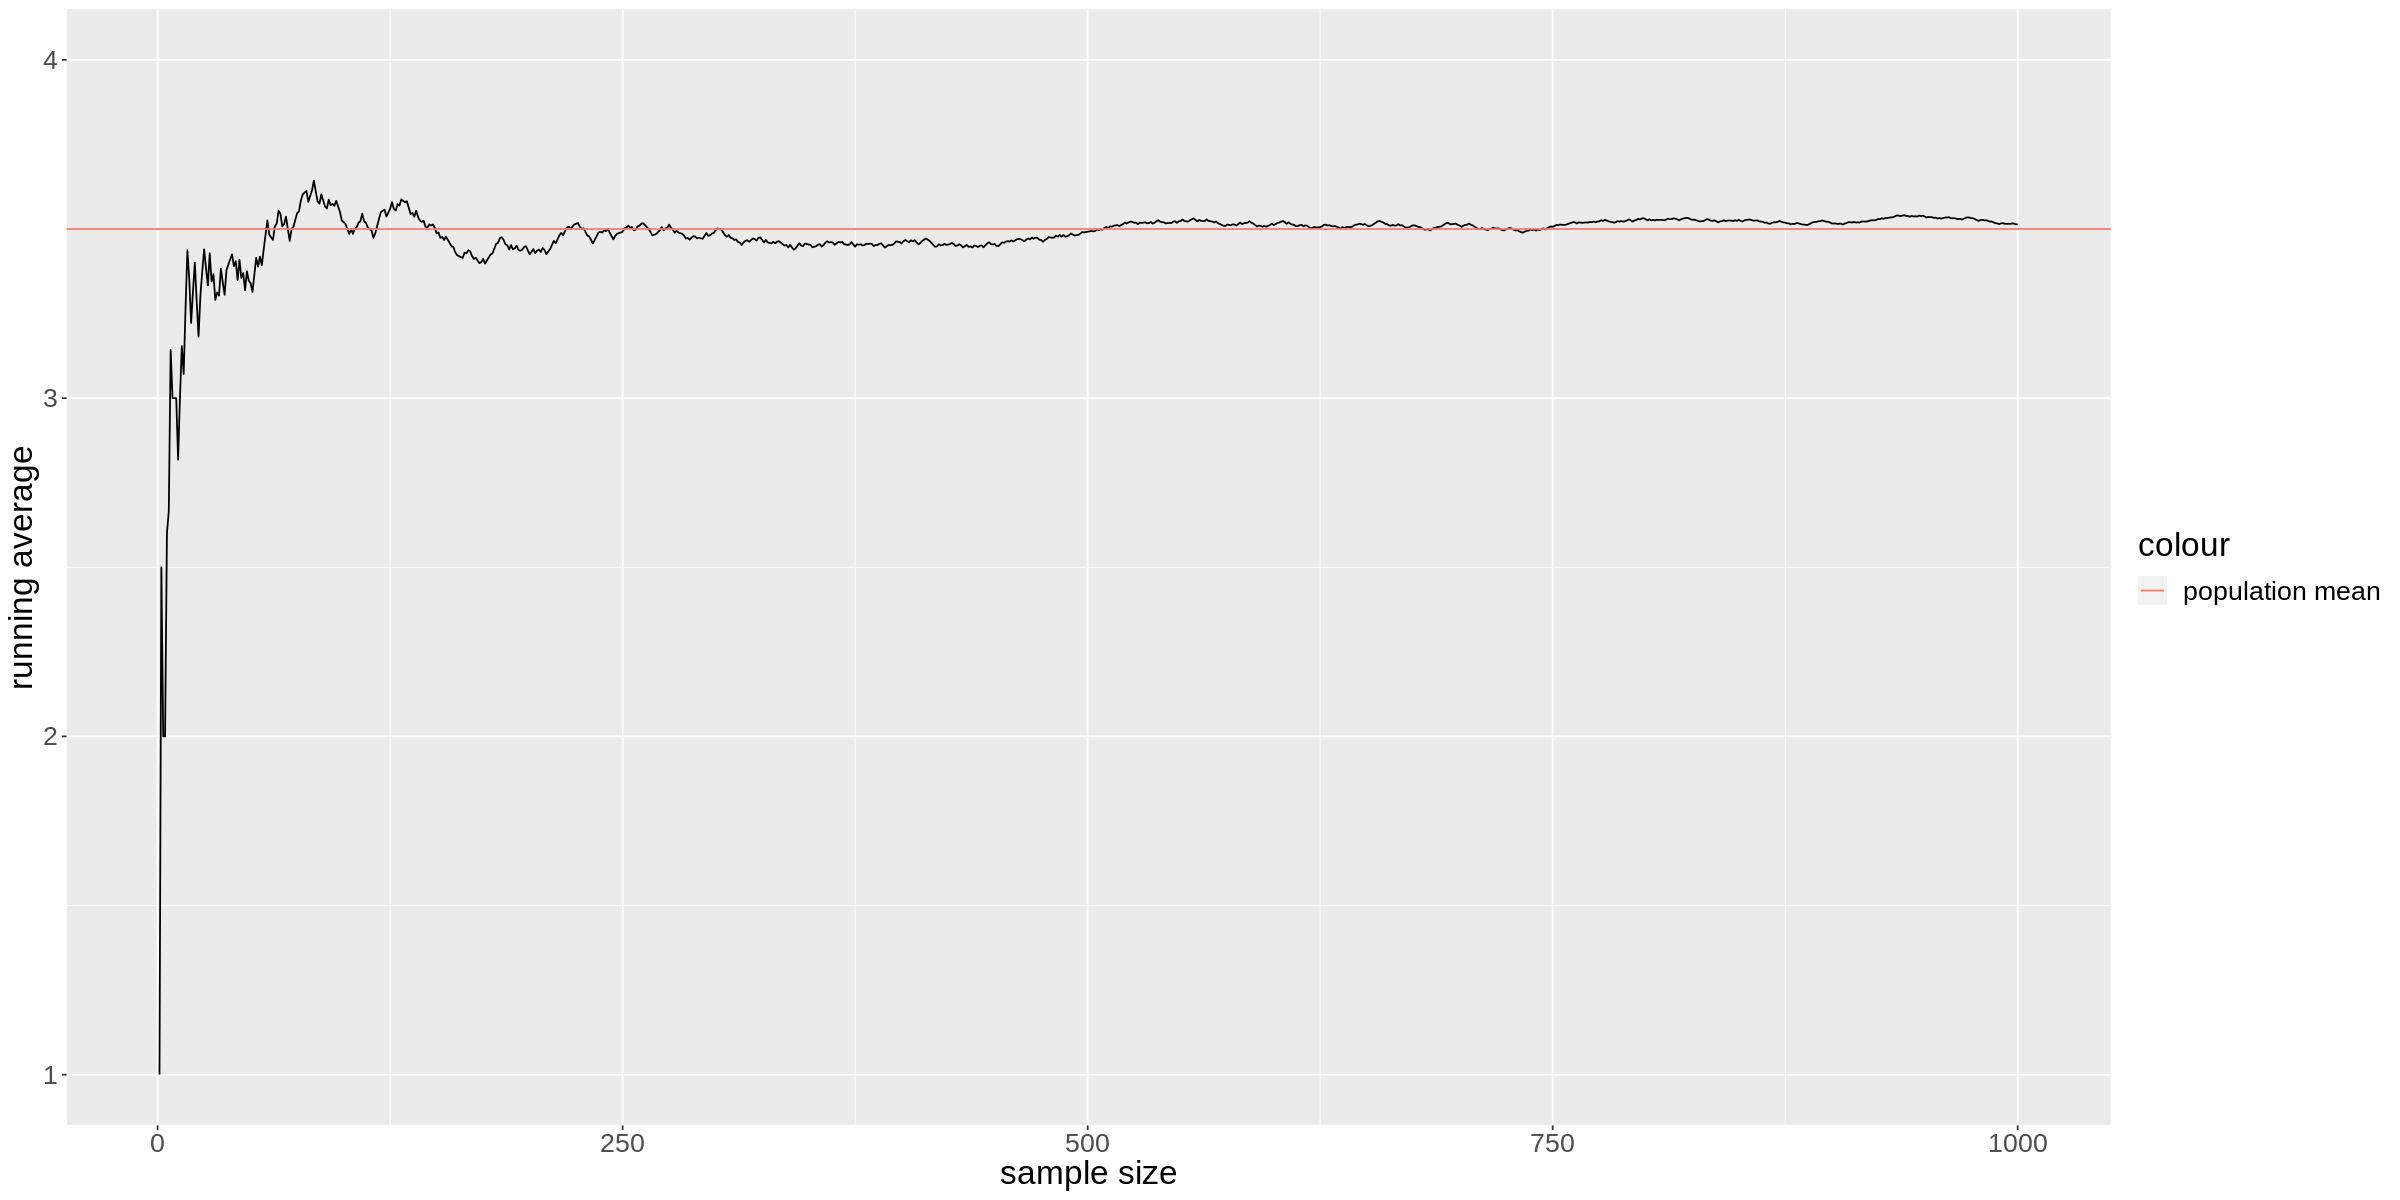

In [40]:
# Your Code Here
set.seed(1)
n = 1000
X = rep(0, n)
r = rep(0, n)
for (j in 1:n) {
    X[j] = sample(1:6, 1, replace=TRUE)
    r[j] = sum(X[1:j])/j
}
#c(mean(X), var(X/n), 35/12/n)
ggplot() + geom_line(aes(1:n, r)) + xlab('sample size') + ylab('running average') + ylim(1,4) +
           geom_hline(aes(yintercept=7/2, color='population mean')) +
           theme(text = element_text(size = 20))

As we can see from the above running averge plot, the mean of the sampling distribution converges to population mean $\frac{7}{2}=3.5$, as the sample size increases (by LLN).